UNSUPERVISED LEARNING : used to perform clustering analysis(dataset ko read krke similarity ke basis pe data ko group krte h ) , unlabeled data used krti h 

PROJECT INTRO : used kmeans clustring algorithm ( which take outliers free data i.e scale down data for better acuracy)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 

In [2]:
df=pd.read_csv("farmer.csv")
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [5]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [6]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [7]:
group=df.groupby('label')
group

In [8]:
group[['N']].describe()

N                                                        
             count    mean        std    min     25%    50%     75%    max
label                                                                     
apple        100.0   20.80  11.863704    0.0   10.00   24.0   30.00   40.0
banana       100.0  100.23  11.107241   80.0   92.00  100.5  108.25  120.0
blackgram    100.0   40.02  12.664258   20.0   28.75   41.0   52.00   60.0
chickpea     100.0   40.09  12.150649   20.0   30.00   39.0   52.00   60.0
coconut      100.0   21.98  11.761931    0.0   13.75   24.0   31.00   40.0
coffee       100.0  101.20  12.345203   80.0   89.00  103.0  112.00  120.0
cotton       100.0  117.77  11.628817  100.0  107.75  117.0  127.50  140.0
grapes       100.0   23.18  12.466829    0.0   11.75   24.0   35.00   40.0
jute         100.0   78.40  10.968274   60.0   70.00   78.0   88.25  100.0
kidneybeans  100.0   20.75  10.834266    0.0   11.75   22.0   28.00   40.0
lentil       100.0   18.77  12.196915    0.0    9.00   16.5   29.25   40.0
maize        100.0   77.76  11.949490   60.0   67.75   76.0   87.00  100.0
mango        100.0   20.07  12.329037    0.0    9.00   21.0   30.25   40.0
mothbeans    100.0   21.44  11.343418    0.0   11.00   22.0   30.25   40.0
mungbean     100.0   20.99  11.510641    0.0   10.00   22.0   31.00   40.0
muskmelon    100.0  100.32  12.176215   80.0   89.00  100.0  111.00  120.0
orange       100.0   19.58  11.941930    0.0    9.00   19.0   31.00   40.0
papaya       100.0   49.88  12.219607   31.0   39.00   49.0   59.25   70.0
pigeonpeas   100.0   20.73  11.849950    0.0   10.00   20.0   30.25   40.0
pomegranate  100.0   18.87  12.617652    0.0    8.00   18.0   29.25   40.0
rice         100.0   79.89  11.917981   60.0   69.00   80.0   91.00   99.0
watermelon   100.0   99.42  12.565127   80.0   89.00   99.0  110.00  120.0

In [9]:
group[['N']].agg(['min', 'max', 'mean'])

N             
             min  max    mean
label                        
apple          0   40   20.80
banana        80  120  100.23
blackgram     20   60   40.02
chickpea      20   60   40.09
coconut        0   40   21.98
coffee        80  120  101.20
cotton       100  140  117.77
grapes         0   40   23.18
jute          60  100   78.40
kidneybeans    0   40   20.75
lentil         0   40   18.77
maize         60  100   77.76
mango          0   40   20.07
mothbeans      0   40   21.44
mungbean       0   40   20.99
muskmelon     80  120  100.32
orange         0   40   19.58
papaya        31   70   49.88
pigeonpeas     0   40   20.73
pomegranate    0   40   18.87
rice          60   99   79.89
watermelon    80  120   99.42

In [10]:
group[['temperature']].min()


,temperature
label,
apple,21.036527
banana,25.010185
blackgram,25.097374
chickpea,17.024985
coconut,25.008724
coffee,23.059519
cotton,22.000851
grapes,8.825675
jute,23.094338


In [11]:
result=group[['temperature']].agg(['min','max','mean'])
result

temperature                      
                    min        max       mean
label                                        
apple         21.036527  23.996862  22.630942
banana        25.010185  29.908885  27.376798
blackgram     25.097374  34.946616  29.973340
chickpea      17.024985  20.995022  18.872847
coconut       25.008724  29.869083  27.409892
coffee        23.059519  27.923744  25.540477
cotton        22.000851  25.992374  23.988958
grapes         8.825675  41.948657  23.849575
jute          23.094338  26.985822  24.958376
kidneybeans   15.330426  24.923601  20.115085
lentil        18.064861  29.944139  24.509052
maize         18.041855  26.549864  22.389204
mango         27.003155  35.990097  31.208770
mothbeans     24.018254  31.999286  28.194920
mungbean      27.014704  29.914544  28.525775
muskmelon     27.024151  29.943492  28.663066
orange        10.010813  34.906653  22.765725
papaya        23.012402  43.675493  33.723859
pigeonpeas    18.319104  36.977944  27.741762
pomegranate   18.071330  24.962732  21.837842
rice          20.045414  26.929951  23.689332
watermelon    24.043558  26.986037  25.591767

In [12]:
result.reset_index(inplace=True)
result

label temperature                      
                        min        max       mean
0         apple   21.036527  23.996862  22.630942
1        banana   25.010185  29.908885  27.376798
2     blackgram   25.097374  34.946616  29.973340
3      chickpea   17.024985  20.995022  18.872847
4       coconut   25.008724  29.869083  27.409892
5        coffee   23.059519  27.923744  25.540477
6        cotton   22.000851  25.992374  23.988958
7        grapes    8.825675  41.948657  23.849575
8          jute   23.094338  26.985822  24.958376
9   kidneybeans   15.330426  24.923601  20.115085
10       lentil   18.064861  29.944139  24.509052
11        maize   18.041855  26.549864  22.389204
12        mango   27.003155  35.990097  31.208770
13    mothbeans   24.018254  31.999286  28.194920
14     mungbean   27.014704  29.914544  28.525775
15    muskmelon   27.024151  29.943492  28.663066
16       orange   10.010813  34.906653  22.765725
17       papaya   23.012402  43.675493  33.723859
18   pigeonpeas   18.319104  36.977944  27.741762
19  pomegranate   18.071330  24.962732  21.837842
20         rice   20.045414  26.929951  23.689332
21   watermelon   24.043558  26.986037  25.591767

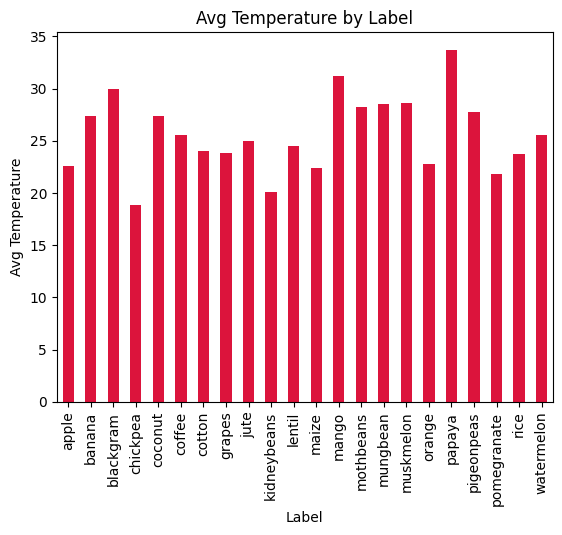

In [13]:
mean_temperature = group['temperature'].mean()
mean_temperature.plot.bar(color='crimson')

plt.xlabel('Label')
plt.ylabel('Avg Temperature')
plt.title('Avg Temperature by Label')

plt.show()

In [14]:
# plt.barh(result.index, result[('temperature', 'mean')], color='red')
# plt.ylabel('Max Temperature')
# plt.xlabel('Labels')
# plt.title('Max Temperature by Label')
# plt.show()

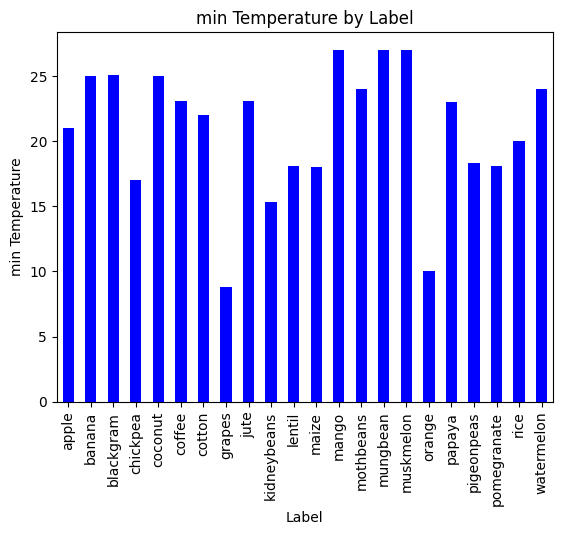

In [15]:
min_temperature = group['temperature'].min()
min_temperature.plot.bar(color='blue')

plt.xlabel('Label')
plt.ylabel('min Temperature')
plt.title('min Temperature by Label')

plt.show()

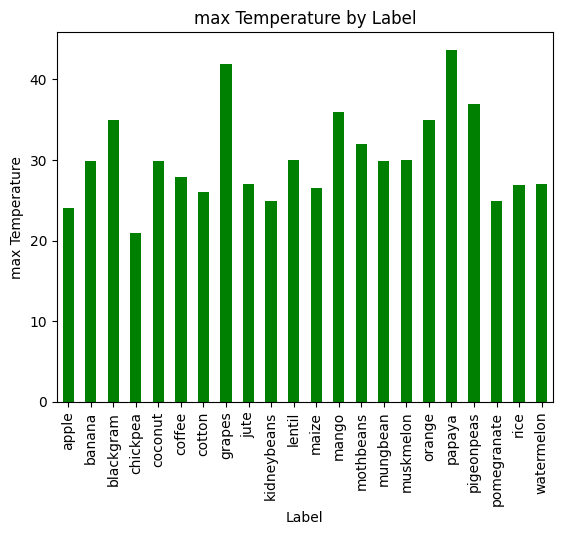

In [16]:
max_temperature = group['temperature'].max()
max_temperature.plot.bar(color='green')

plt.xlabel('Label')
plt.ylabel('max Temperature')
plt.title('max Temperature by Label')

plt.show()

In [17]:
# ye tino value n,p,khumidity inke liye calculate krke bar chart banan h 

In [18]:
a=group[['N']].agg(['min', 'max', 'mean'])

In [19]:
a.reset_index(inplace=True)

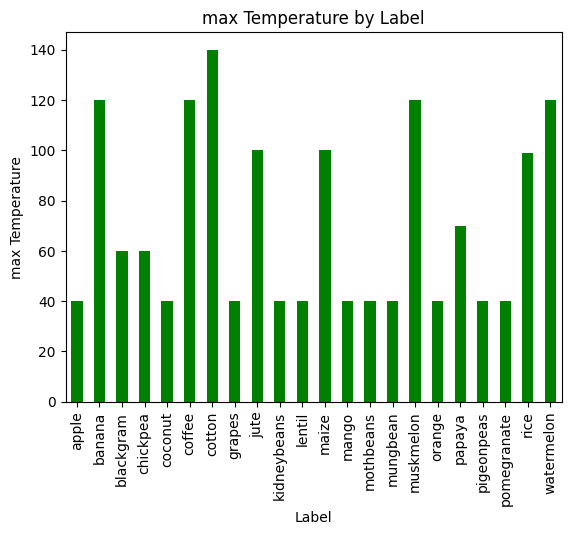

In [20]:
max_N = group['N'].max()
max_N.plot.bar(color='green')

plt.xlabel('Label')
plt.ylabel('max Temperature')
plt.title('max Temperature by Label')

plt.show()

In [21]:
b=group[['P']].agg(['min', 'max', 'mean'])
b.reset_index(inplace=True)

Text(0.5, 1.0, 'max Temperature by Label')

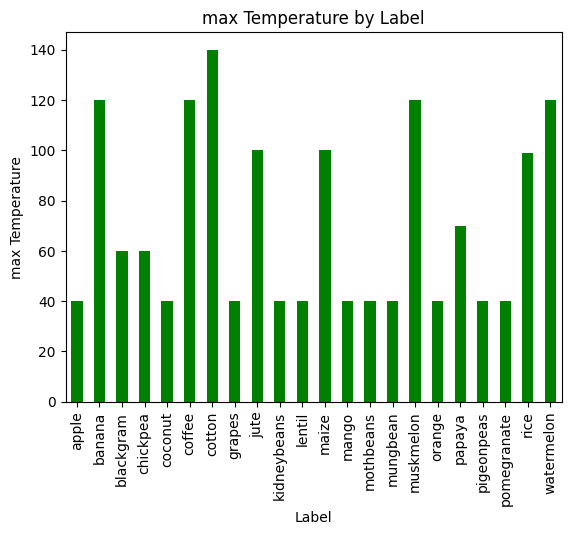

In [22]:
max_N = group['N'].max()
max_N.plot.bar(color='green')

plt.xlabel('Label')
plt.ylabel('max Temperature')
plt.title('max Temperature by Label')

In [23]:
c=group[['humidity']].agg(['min', 'max', 'mean'])
c.reset_index(inplace=True)

Text(0.5, 1.0, 'max Temperature by Label')

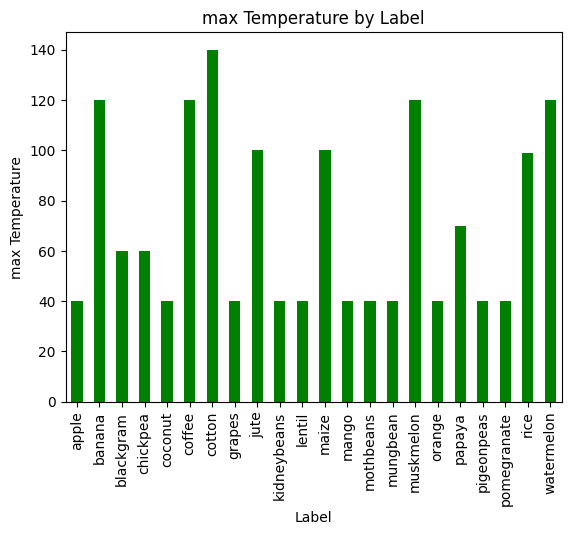

In [24]:
max_N = group['N'].max()
max_N.plot.bar(color='green')

plt.xlabel('Label')
plt.ylabel('max Temperature')
plt.title('max Temperature by Label')

In [25]:
x= df.drop('label',axis='columns')
x

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [26]:
x.duplicated().sum()

0

In [27]:
x.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
dtype: int64

In [28]:
x.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
dtype: object

<Axes: xlabel='temperature', ylabel='Density'>

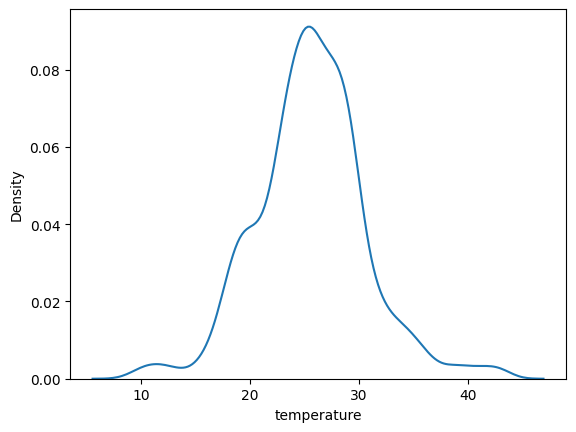

In [29]:
sns.kdeplot(x['temperature'])

In [30]:
x.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [31]:
# data transformation : numerical data ko numerical m change krna in a range called scalilng by kmeans algorithm 
# data ko scale krna in same range [0,1]





In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
# Z-score ek statistical measurement hota hai jo data point ki position ko mean se distance ke roop mein represent karta hai,
#  normalized by the standard deviation. 
# Yeh batata hai ki ek particular data point mean se kitne standard deviations door hai.

# Z-score ko formula se calculate kiya jaata hai: z= (x-mean)/standard deviation 
# Z-score = 0: Data point mean ke barabar hai.
# Positive Z-score: Data point mean se upar hai (mean ke right mein).
# Negative Z-score: Data point mean se neeche hai (mean ke left mein).



In [34]:
std_scaler=StandardScaler()  # used to hidden outliers . because kmeans algo needs outliers free data 

In [35]:
x_transformed=std_scaler.fit_transform(x)

In [36]:
x_transformed.shape

(2200, 7)

In [37]:
x.shape

(2200, 7)

In [38]:
pd.DataFrame(x_transformed)

,0,1,2,3,4,5,6
0,1.068797,-0.344551,-0.101688,-0.935587,0.472666,0.043302,1.810361
1,0.933329,0.140616,-0.141185,-0.759646,0.397051,0.734873,2.242058
2,0.255986,0.049647,-0.081939,-0.515898,0.486954,1.771510,2.921066
3,0.635298,-0.556811,-0.160933,0.172807,0.389805,0.660308,2.537048
4,0.743673,-0.344551,-0.121436,-1.083647,0.454792,1.497868,2.898373
...,...,...,...,...,...,...,...
2195,1.529390,-0.587134,-0.318922,0.228814,-0.227709,0.401395,1.352437
2196,1.312641,-1.163269,-0.417666,0.355720,-0.666947,-0.494413,0.445183
2197,1.827421,-0.617457,-0.358420,-0.293218,-0.191235,-0.138120,1.271418
2198,1.800327,-0.647780,-0.279425,0.129612,-0.869518,0.373904,0.431545


In [39]:
pd.DataFrame(x_transformed)[3]

0      -0.935587
1      -0.759646
2      -0.515898
3       0.172807
4      -1.083647
          ...   
2195    0.228814
2196    0.355720
2197   -0.293218
2198    0.129612
2199   -0.397667
Name: 3, Length: 2200, dtype: float64

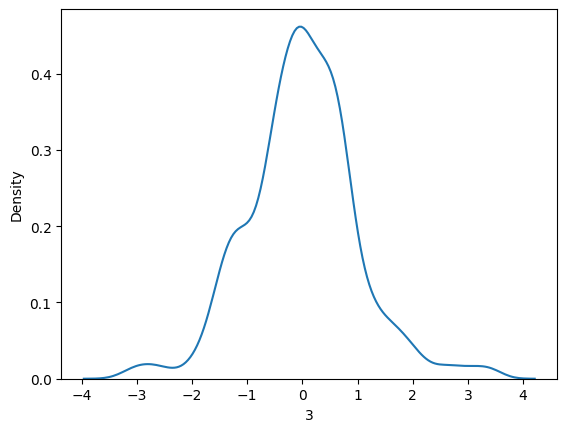

In [40]:
sns.kdeplot(pd.DataFrame(x_transformed)[3])
plt.show()

In [41]:
from sklearn.cluster import KMeans   # K-means ek popular clustering algorithm hai jo unlabeled data ko groups (clusters) mein divide karti hai. Clustering ka matlab hota hai ki similar data points ko ek group mein rakhna, taki har group ke andar wale points ek-dusre ke zyada kareeb hon.

In [42]:
kmeans_obj=KMeans()       # ye bydefault number of cluster 8 dtei h 

In [43]:
labels=kmeans_obj.fit_predict(x_transformed)    # ab algo train bhi hogyi or prediction bhi ho gyi 

In [44]:
set(labels)

{0, 1, 2, 3, 4, 5, 6, 7}

In [45]:
labels

array([1, 1, 1, ..., 1, 4, 1])

In [46]:
labels.shape

(2200,)

In [47]:
x_transformed.shape

(2200, 7)

In [48]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [49]:
df['cluster_no']=labels

In [50]:
df.head(40)

,N,P,K,temperature,humidity,ph,rainfall,label,cluster_no
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice,1
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice,1
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice,1
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice,1
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice,1


In [51]:
df[df['cluster_no']==5]['label'].unique()

array(['maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'lentil'],
      dtype=object)

In [52]:
df[df['cluster_no']==7]['label'].unique()

array(['chickpea'], dtype=object)

In [53]:
import os ,joblib

In [54]:
os.makedirs('models',exist_ok=True)
joblib.dump(std_scaler,'./models/std_scaler.lb')
joblib.dump(kmeans_obj,'./models/kmeans_model.lb')

['./models/kmeans_model.lb']

In [55]:
df[['label','cluster_no']].to_csv('./models/filter_crops.csv',index=False)